## Simple Python Linear Regression Estimator Using Gradient Descent

We build a simple linear regression estimator using the gradient descent approximation. The estimator is used to predict house prices using the Housing dataset. Hyperparameter tuning is used to find the regression model with the best performance by evalauting the $R^2$ value for different learning rates. 

References:

1. “Machine Learning: Python Linear Regression Estimator Using Gradient Descent”, Benjamin O. Tayo (https://medium.com/@benjaminobi/machine-leaning-python-linear-regression-estimator-using-gradient-descent-b0b2c496e463).

2. “Python Machine Learning”, 2nd Edition, Sebastian Raschka.

3. UCI machine learning repository at https://archive.ics.uci.edu/ml/machine-learning-databases/housing/.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
np.set_printoptions(precision=4)

## Linear Regression Estimator

In [2]:
class GradientDescent(object):
    """Gradient descent optimizer.
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
        
    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Error in every epoch.
        
    Methods
    -----------
    fit(X,y): fit the linear regression model using the training data.
    predict(X): Predict outcome for samples in X.
    Rsquare(X,y): Returns the R^2 value.
    """

    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """Fit the data.
        
        Parameters
        ----------
        X : {array-like}, shape = [n_points]
        Independent variable or predictor.
        y : array-like, shape = [n_points]
        Outcome of prediction.
        Returns
        -------
        self : object
        """
        self.w_ = np.zeros(2)
        self.errors_ = []
        
        for i in range(self.n_iter):
            errors = 0
            for j in range(X.shape[0]):
                self.w_[1:] += self.eta*X[j]*(y[j] - self.w_[0] - self.w_[1]*X[j])
                self.w_[0] += self.eta*(y[j] - self.w_[0] - self.w_[1]*X[j])
                errors += 0.5*(y[j] - self.w_[0] - self.w_[1]*X[j])**2
            self.errors_.append(errors)
        return self
    

    def predict(self, X):
        """Return predicted y values"""
        return self.w_[0] + self.w_[1]*X 
    
    def Rsquare(self, X,y):
        """Return the Rsquare value"""
        y_hat = self.predict(X)
        return  1-((y_hat - y)**2).sum()/((y-np.mean(y))**2).sum()

## Application of Python Estimator: Predicting Housing Prices

## a) Exploring the Housing Dataset

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-2nd-edition'
                 '/master/code/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## b) Feature Selection and Standardization

In [4]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(df[cols].iloc[:,range(0,5)].values)

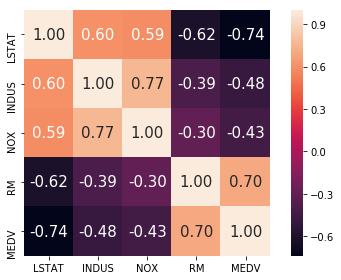

In [5]:
cov_mat =np.cov(X_std.T)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout()
# plt.savefig('images/10_04.png', dpi=300)
plt.show()

In [6]:
X=X_std[:,3] # we use average number of rooms per dwelling as our predictor variable
y=X_std[:,4] # we use median value of the homes as our target variable

## c) Calculate $R^2$ Values 

In [7]:
[GradientDescent(eta=k, n_iter=100).fit(X,y).Rsquare(X,y) for k in [0.1,0.01,0.001,0.0001,0.00001,0.000001]]

[0.2974887783545511,
 0.3119248157462057,
 0.4817930081527624,
 0.4834678324607017,
 0.30768738844258836,
 0.04653667576500009]

## d) Fit , Predict, and Hyperparameter Tuning

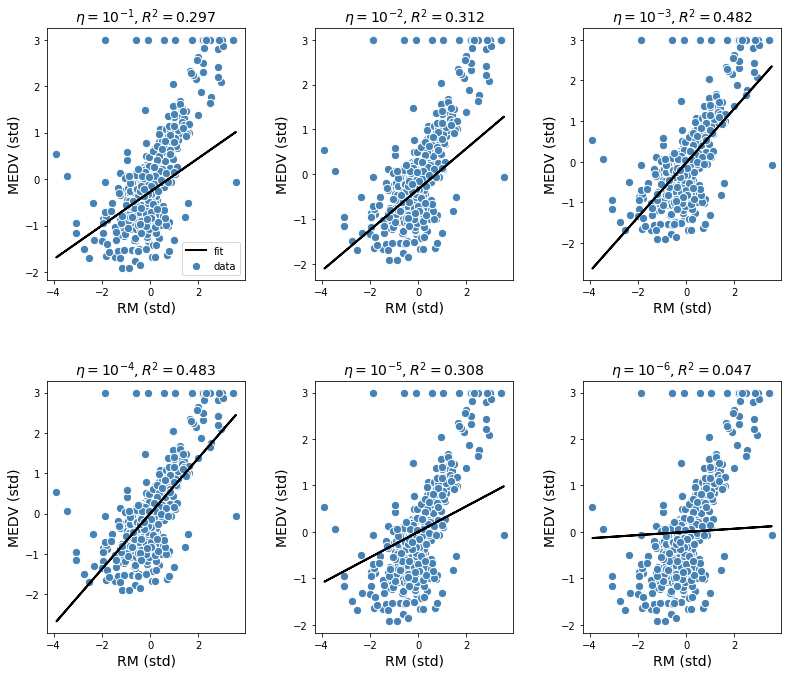

In [8]:
np.set_printoptions(precision=1)
# plot with various axes scales
plt.figure(figsize=(12,10))

# fig 1
plt.subplot(231)
plt.scatter(X,y,c='steelblue', edgecolor='white', s=70,label='data')
plt.plot(X, GradientDescent(eta=0.1, n_iter=100).fit(X,y).predict(X),color='black', lw=2,label='fit')
plt.title('$\eta = 10^{-1}, R^2 = 0.297$ ',size=14)
plt.grid(False)
plt.xlabel('RM (std)',size=14)
plt.ylabel('MEDV (std)',size=14)
plt.legend()

# fig 2
plt.subplot(232)
plt.scatter(X,y,c='steelblue', edgecolor='white', s=70)
plt.plot(X, GradientDescent(eta=0.01, n_iter=100).fit(X,y).predict(X),color='black', lw=2)
plt.title('$\eta = 10^{-2},R^2 = 0.312$',size=14)
plt.grid(False)
plt.xlabel('RM (std)',size=14)
plt.ylabel('MEDV (std)',size=14)

# fig 3
plt.subplot(233)
plt.scatter(X,y,c='steelblue', edgecolor='white', s=70)
plt.plot(X,GradientDescent(eta=0.001, n_iter=100).fit(X,y).predict(X),color='black', lw=2)
plt.title('$\eta =10^{-3},R^2 = 0.482$',size=14)
plt.grid(False)
plt.xlabel('RM (std)',size=14)
plt.ylabel('MEDV (std)',size=14)

# fig 4
plt.subplot(234)
plt.scatter(X,y,c='steelblue', edgecolor='white', s=70)
plt.plot(X, GradientDescent(eta=0.0001, n_iter=100).fit(X,y).predict(X),color='black', lw=2)
plt.title('$\eta = 10^{-4}, R^2 = 0.483$ ',size=14)
plt.grid(False)
plt.xlabel('RM (std)',size=14)
plt.ylabel('MEDV (std)',size=14)

# fig 5
plt.subplot(235)
plt.scatter(X,y,c='steelblue', edgecolor='white', s=70)
plt.plot(X, GradientDescent(eta=0.00001, n_iter=100).fit(X,y).predict(X),color='black', lw=2)
plt.title('$\eta = 10^{-5},R^2 = 0.308$',size=14)
plt.grid(False)
plt.xlabel('RM (std)',size=14)
plt.ylabel('MEDV (std)',size=14)

# fig 6
plt.subplot(236)
plt.scatter(X,y,c='steelblue', edgecolor='white', s=70)
plt.plot(X,GradientDescent(eta=0.000001, n_iter=100).fit(X,y).predict(X),color='black', lw=2)
plt.title('$\eta =10^{-6},R^2 = 0.047$',size=14)
plt.grid(False)
plt.xlabel('RM (std)',size=14)
plt.ylabel('MEDV (std)',size=14)

# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
#plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.4,
                    wspace=0.35)

plt.show()